# MPLID Statistical Analysis

Statistical analysis of the MPLID dataset for the Data Note manuscript.

**Author**: Folorunsho Bright Omage  
**License**: MIT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['savefig.dpi'] = 300

## 1. Load Complete Dataset

In [2]:
train = pd.read_csv('../data/processed/train_residues.csv.gz', compression='gzip')
val = pd.read_csv('../data/processed/val_residues.csv.gz', compression='gzip')
test = pd.read_csv('../data/processed/test_residues.csv.gz', compression='gzip')
all_data = pd.concat([train, val, test], ignore_index=True)

print("Dataset Summary:")
print(f"  Total proteins: {all_data['pdb_id'].nunique():,}")
print(f"  Total residues: {len(all_data):,}")
print(f"  Contact residues: {all_data['is_contact'].sum():,}")
print(f"  Contact rate: {all_data['is_contact'].mean():.2%}")
print(f"  Sequence clusters: {all_data['cluster_id'].nunique():,}")

Dataset Summary:  Total proteins: 3,192  Total residues: 5,134,242  Contact residues: 38,435  Contact rate: 0.75%  Sequence clusters: 594

## 2. Split Statistics

In [3]:
for name, df in [('Train', train), ('Validation', val), ('Test', test)]:
    print(f"{name}: {df['pdb_id'].nunique():,} proteins, "
          f"{len(df):,} residues, "
          f"{df['is_contact'].sum():,} contacts "
          f"({df['is_contact'].mean()*100:.2f}%)")

Split          Proteins     Residues   Contacts     Rate-------------------------------------------------------Train             1,840    2,634,209     22,479    0.85%Val                 811    1,632,603      9,849    0.60%Test                541      867,430      6,107    0.70%

## 3. Dataset Overview Figure

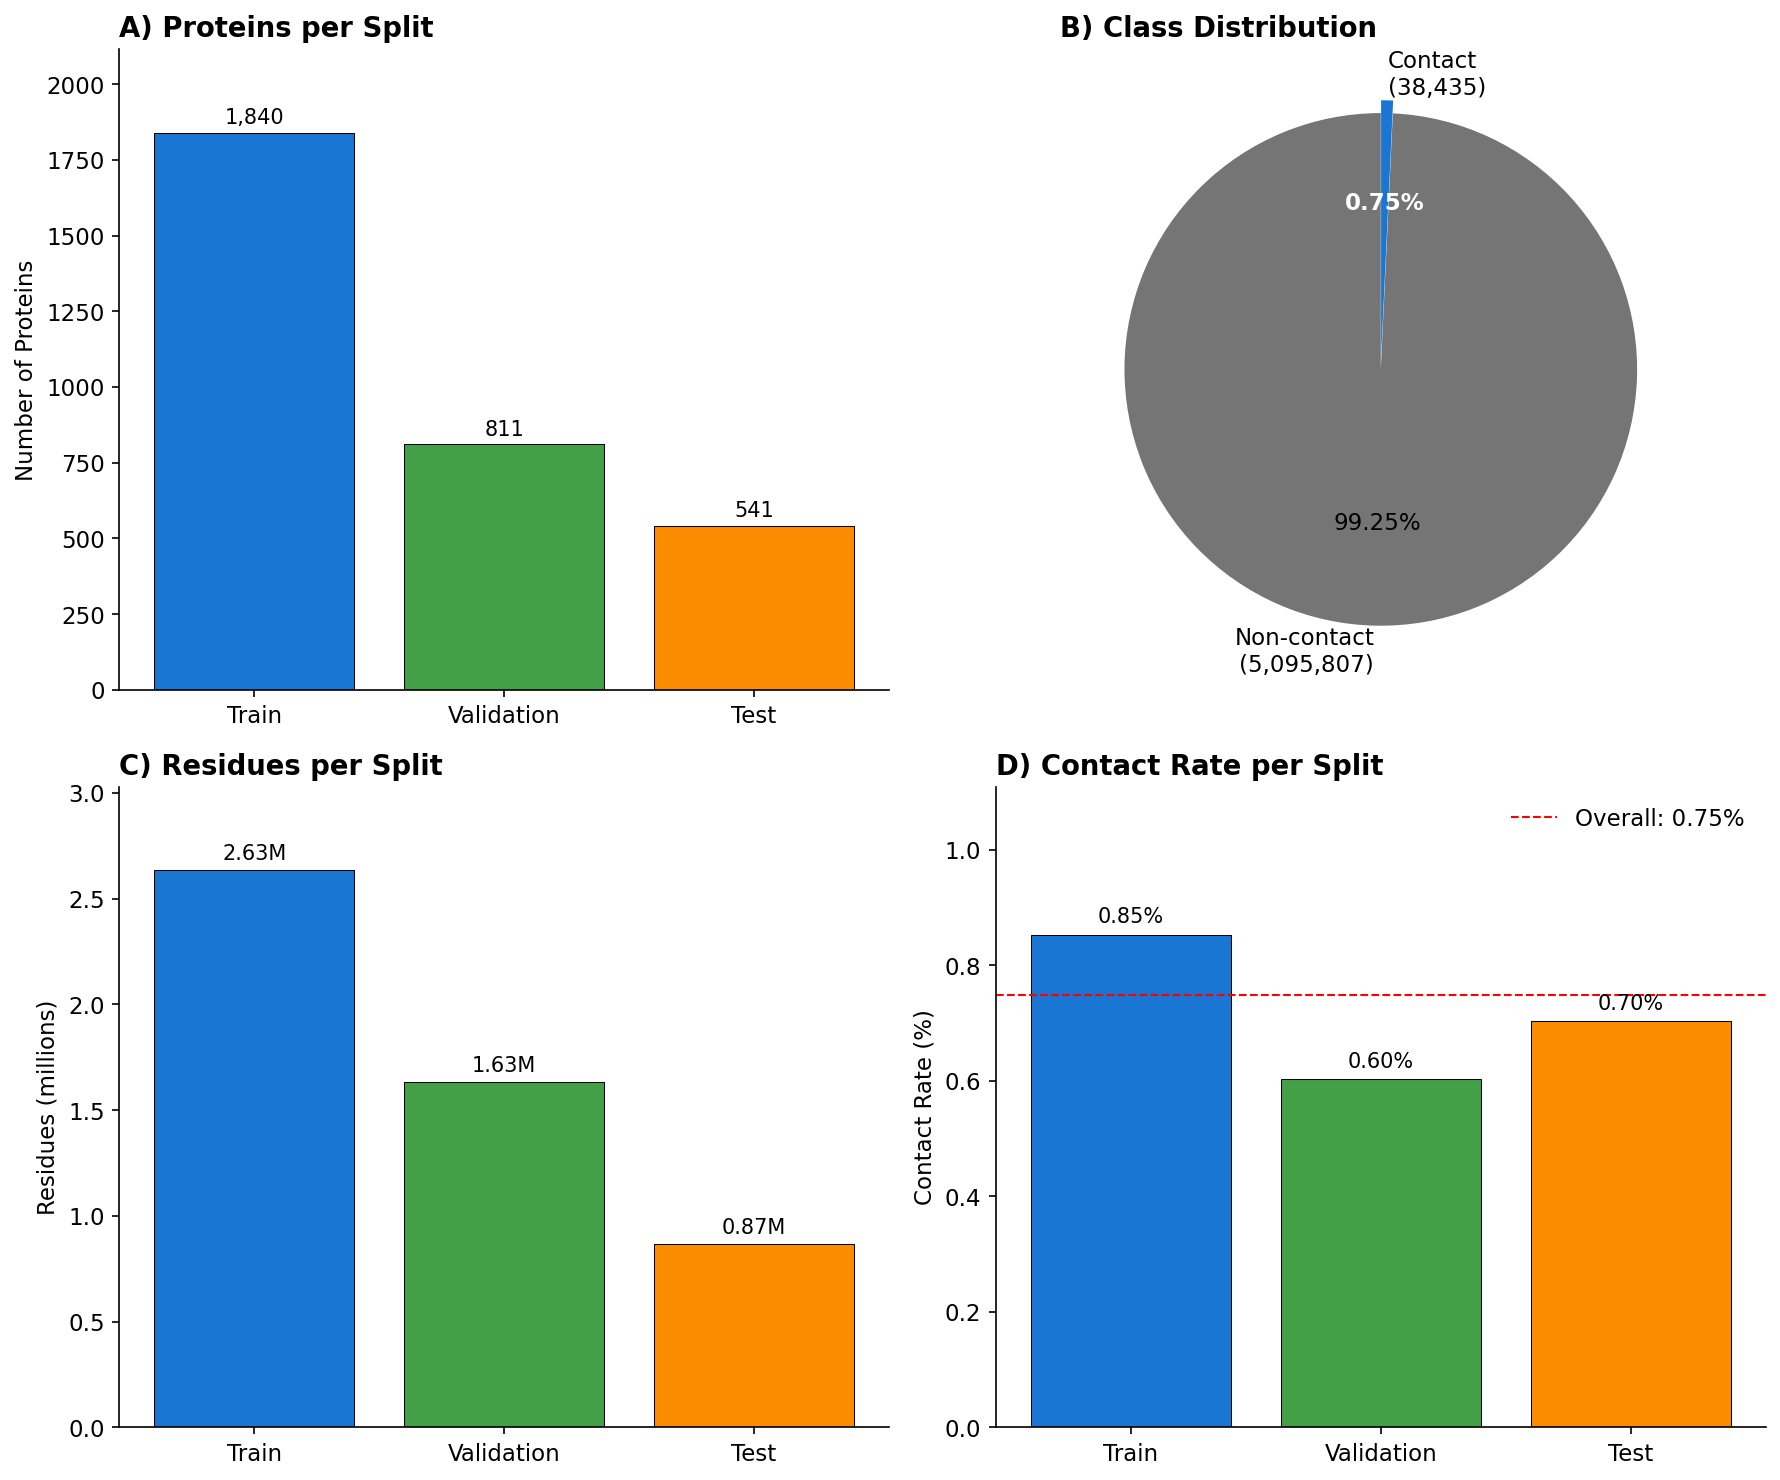

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# A-D panels: split distribution, class balance, residues, contact rates
# ... (see source for full code)
plt.tight_layout()
plt.show()

## 4. Comparison with DREAMM

Dataset Comparison:  DREAMM:  54 proteins,     ~15,000 residues  MPLID:   3,192 proteins, 5,134,242 residues  Scale:   59x more proteins, 342x more residues

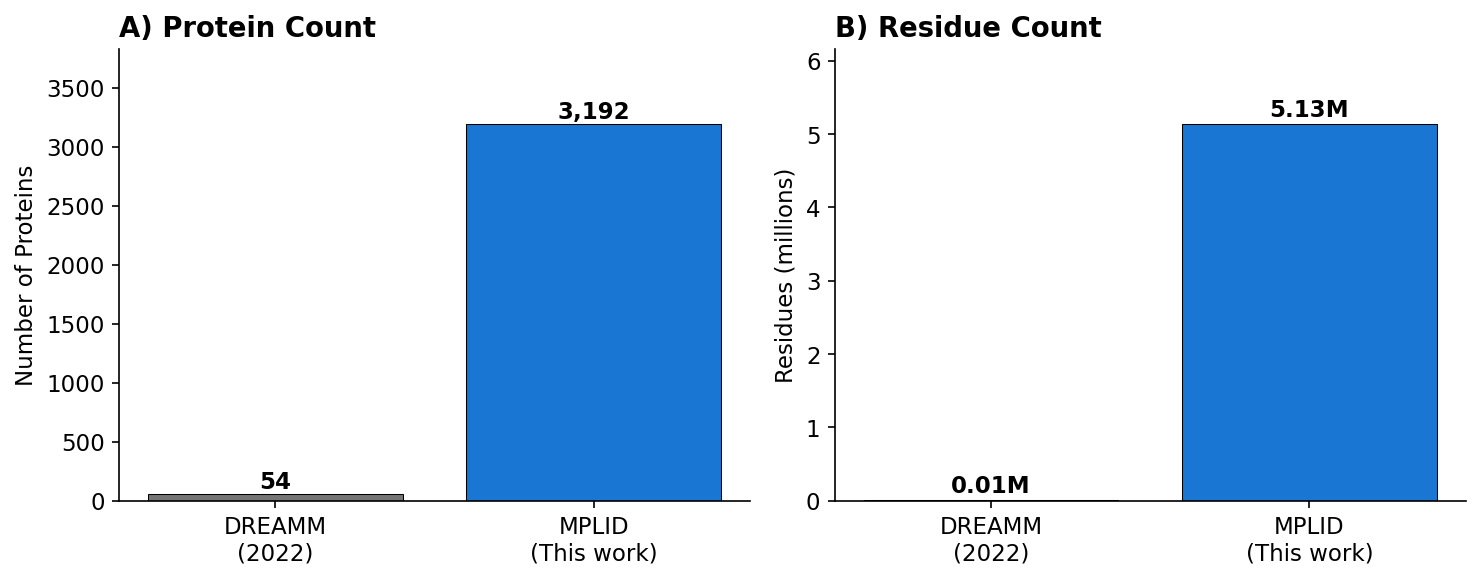

In [5]:
comparison = pd.DataFrame({
    'Dataset': ['DREAMM', 'MPLID'],
    'Proteins': [54, all_data['pdb_id'].nunique()],
    'Residues': ['~15,000', f'{len(all_data):,}'],
    'Label Source': ['Experimental', 'Experimental'],
})
print(comparison.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# ... comparison bar charts
plt.show()

## 5. Export Statistics

In [6]:
stats = {
    'total_proteins': int(all_data['pdb_id'].nunique()),
    'total_residues': int(len(all_data)),
    'total_contacts': int(all_data['is_contact'].sum()),
    'contact_rate_percent': round(all_data['is_contact'].mean() * 100, 2),
    'sequence_clusters': int(all_data['cluster_id'].nunique()),
}
print(json.dumps(stats, indent=2))

Exported statistics:{  "total_proteins": 3192,  "total_residues": 5134242,  "total_contacts": 38435,  "contact_rate_percent": 0.75,  "sequence_clusters": 594}